In [684]:
# -*- coding: utf-8 -*-
from __future__ import division
import scipy.stats as st
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from pandas import Series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from sqlalchemy import create_engine
import numpy as np
import os 
#from pygal import Bar,StackedBar
import seaborn as sns
import matplotlib.pyplot as plt
from fitter import Fitter 
from scipy import stats
import pandas as pd
import random
import matplotlib.pyplot as plt
import plotly 
plotly.tools.set_credentials_file(username='dbhpresidente', api_key='VbaoYWxvXkrMvIx6ca9Y')
import plotly.graph_objs as go
%matplotlib inline

In [33]:
##Carga de datos
df_ingresos=pd.read_csv('ingresos.csv')
df_plan_de_estudios=pd.read_csv('plan_de_estudios.csv')
df_egresados_titulados=pd.read_csv('egresados_titulos.csv')
df_activos=pd.read_csv('activos.csv')
df_indice_reprobados=pd.read_csv('indice_reprobados.csv')
df_base=pd.read_csv('base.csv')
df_tabla_prof=pd.read_csv('tabla_prof.csv')
df_tabla_final=pd.read_csv('tabla_final.csv')
df_tabla_mat=pd.read_csv('tabla_mat.csv')

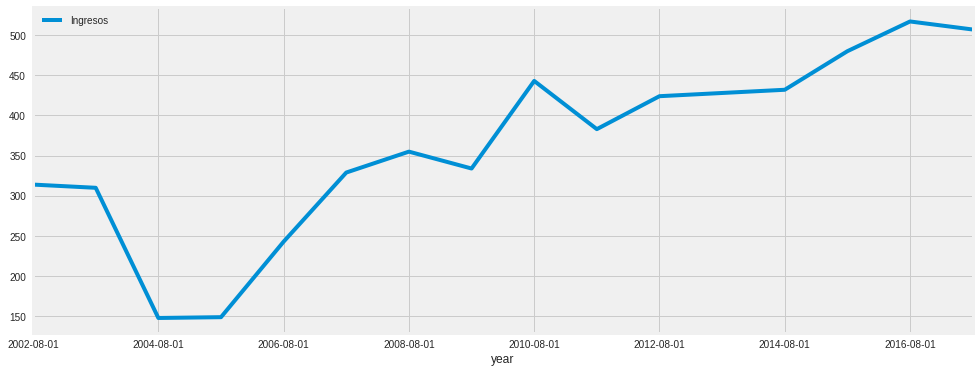

In [34]:
##Analisis de modelo de ingresos
y=df_ingresos.copy()
y= pd.Series(df_ingresos['Total'].tolist(),index=y['Año'])
y=pd.DataFrame(y,columns=['Ingresos'])
y['new']="-08-01"
y['new1']=y.index.astype(str)
y['year']=y['new1']+y['new']
y.index=y['year']
y.plot(figsize=(15, 6))
plt.show()
y=y.drop(['new','year'],axis=1)

In [35]:
y=y.drop('new1',axis=1)

In [36]:
# prepare data
X = y.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=336.857, Expected=443
>Predicted=459.125, Expected=383
>Predicted=390.667, Expected=424
>Predicted=435.000, Expected=428
>Predicted=438.364, Expected=432
>Predicted=441.833, Expected=480
>Predicted=492.769, Expected=517
>Predicted=531.500, Expected=507
RMSE: 51.120


In [37]:
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
print(residuals.describe())

                0
count    8.000000
mean    10.985624
std     53.372722
min    -76.125000
25%    -11.375000
50%      8.933566
75%     34.541667
max    106.142857


In [38]:
m_ingresos=float(residuals.mean())
s_ingresos=float(residuals.std())
bias = np.random.normal(m_ingresos,s_ingresos)
yhat = bias+float(model_fit.forecast()[0])
print('Predicted: %.0f' % yhat)

Predicted: 541


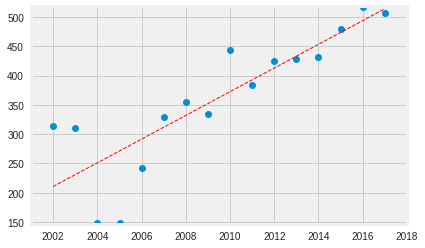

In [39]:
y=df_ingresos.copy()
y= pd.Series(df_ingresos['Total'].tolist(),index=y['Año'])
y=pd.DataFrame(y,columns=['Ingresos'])
y['new']="-08-01"
y['new1']=y.index.astype(str)
y['year']=y['new1']+y['new']
y.index=y['year']
y=y.drop(['new','year'],axis=1)
X=y['new1'].copy().astype(float).tolist()
Y=y['Ingresos'].copy().astype(float).tolist()
# Calculamos los coeficientes del ajuste (a X + b)
a_ingresos, b_ingresos = np.polyfit(X, Y, 1)
# Calculamos el coeficiente de correlación
r = np.corrcoef(X, Y)
# Dibujamos los datos para poder visualizarlos y ver si sería lógico 
# considerar el ajuste usando un modelo lineal
plt.plot(X, Y, 'o')
plt.xlim(np.min(X) -1, np.max(X) +1)
plt.ylim(np.min(Y) -1, np.max(Y) +1)
y['aux']=y['new1'].astype(float)*a_ingresos+b_ingresos
plt.plot(X, y['aux'].tolist(),linestyle='--',linewidth=1.0,color="red")

In [40]:
int(2018*a_ingresos+b_ingresos+np.random.normal(m_ingresos,s_ingresos))

528

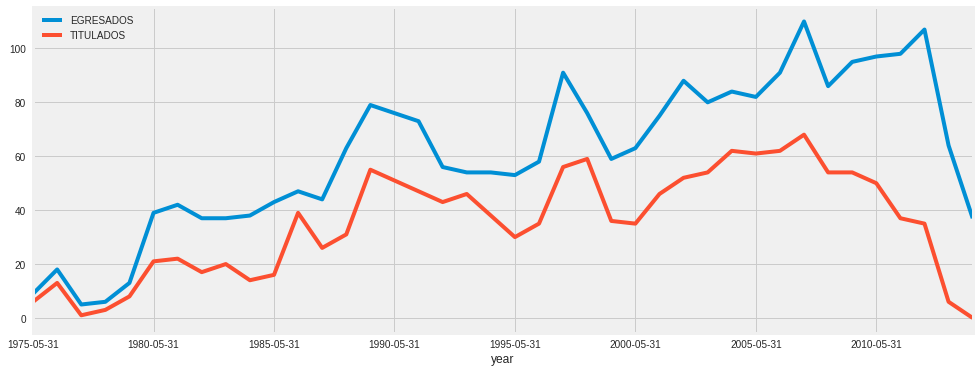

In [406]:
##Analisis de modelo de egresos
w=df_egresados_titulados.copy()
w['new']="-05-31"
w.index=w['Gen.']
w['new1']=w.index.astype(str)
w['year']=w['new1']+w['new']
w.index=w['year']
w=w.drop(['new','year'],axis=1)
w=w.drop('Gen.',axis=1)
w=w.drop('1969-05-31',axis=0)
w.plot(figsize=(15, 6))
w
plt.plot(w['new1'],w.EGRESADOS,'-')

In [42]:
# prepare data
m=w.drop(['TITULADOS','new1'],axis=1)
X = m.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=56.368, Expected= 53
>Predicted=55.200, Expected= 58
>Predicted=60.333, Expected= 91
>Predicted=94.727, Expected= 76
>Predicted=78.913, Expected= 59
>Predicted=61.083, Expected= 63
>Predicted=65.160, Expected= 75
>Predicted=77.538, Expected= 88
>Predicted=90.926, Expected= 80
>Predicted=82.536, Expected= 84
>Predicted=86.586, Expected= 82
>Predicted=84.433, Expected= 91
>Predicted=93.645, Expected=110
>Predicted=113.156, Expected= 86
>Predicted=88.333, Expected= 95
>Predicted=97.529, Expected= 97
>Predicted=99.514, Expected= 98
>Predicted=100.472, Expected=107
>Predicted=109.649, Expected= 64
>Predicted=65.447, Expected= 37
RMSE: 17.450


In [43]:
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = pd.DataFrame(residuals)
print(residuals.describe())

               0
count  20.000000
mean   -3.377586
std    17.564843
min   -45.648649
25%   -12.876263
50%     0.467437
75%     6.591667
max    30.666667


In [44]:
m_egresos=float(residuals.mean())
s_egresos=float(residuals.std())
bias = np.random.normal(m_egresos,s_egresos)
yhat = bias+float(model_fit.forecast()[0])
print('Predicted: %.0f' % yhat)

Predicted: 41


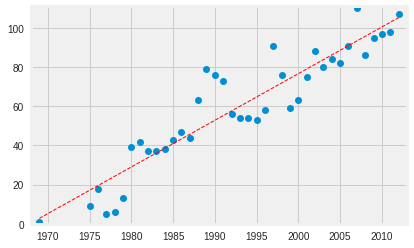

In [45]:

df_egresados_titulados.index=df_egresados_titulados['Gen.']
w=df_egresados_titulados.copy()
w=w.drop([2013,2014],axis=0)
X=w['Gen.'].copy().astype(float).tolist()
Y=w['EGRESADOS'].copy().astype(float).tolist()
# Calculamos los coeficientes del ajuste (a X + b)
a_egresos, b_egresos = np.polyfit(X, Y, 1)
# Calculamos el coeficiente de correlación
r = np.corrcoef(X, Y)
# Dibujamos los datos para poder visualizarlos y ver si sería lógico 
# considerar el ajuste usando un modelo lineal
plt.plot(X, Y, 'o')
plt.xlim(np.min(X) -1, np.max(X) +1)
plt.ylim(np.min(Y) -1, np.max(Y) +1)
w['aux']=w['Gen.'].astype(float)*a_egresos+b_egresos
plt.plot(X, w['aux'].tolist(),linestyle='--', linewidth=1.0,color='red')

In [46]:
int(2015*a_egresos+b_egresos+np.random.normal(m_egresos,s_egresos))

116

In [47]:
def sim_ingreso(n,gen):
    z=[]
    for i in range(0,n):
        z.append(int(gen*a_ingresos+b_ingresos+np.random.normal(m_ingresos,s_ingresos)))
    return z
def sim_egreso(n,gen):
    z=[]
    for i in range(0,n):
        z.append(int(gen*a_egresos+b_egresos+np.random.normal(m_egresos,s_egresos)))
    return z

In [51]:
##Los Ingresos
z1=[]
for i in y['new1']:
    z1.append(int(pd.DataFrame(sim_ingreso(100000,int(i))).mean()))
y['new2']=z1
z2=[]
for i in w['new1']:
    z2.append(int(pd.DataFrame(sim_egreso(100000,int(i))).mean()))
w['new2']=z2

In [52]:
##Los egresos esperados
int(pd.DataFrame(sim_egreso(100000,2015)).mean())

108

In [53]:
y['error']=(y.Ingresos-y.new2)/y.Ingresos
print y['error'].mean()

-0.0895624841271


In [58]:
w['error']=(w.EGRESADOS-w.aux)/w.EGRESADOS
print w['error'].mean()

AttributeError: 'DataFrame' object has no attribute 'aux'

In [59]:
df_activos

,NOMBRE_PROFESOR,ID_PROFESOR
0,CHAVEZ GARCIA MIGUEL ANGEL,165
1,CAÑADA BAPTISTA FERNANDO DANIEL,166
2,BUQUET SABAT DANIEL,104
3,BASURTO RODRIGUEZ AUREA CARMEN,128
4,BAUTISTA MENDOZA GAMALIEL,182
5,BARRERA CEBALLOS JORGE ARMANDO,199
6,AGUILAR SANCHEZ ALMA ROSA,189
7,ARRIAGA PARRA MARIO,52
8,ARRIAGA ALEMAN JOSE ROBERTO,183
9,ARTEAGA NAVARRO JULIO ENRIQUE,129


In [60]:
df_plan_de_estudios[df_plan_de_estudios['SEMESTRE']==10]

,MATERIA,SEMESTRE
82,CALCULO DIFER. E INTEGRAL I,10
83,INTRODUCCION A COMPUTACION,10
84,CONTABILIDAD GENERAL,10
85,APLICACIONES A MAT.FINANCRAS,10
86,INVESTIGACION DE OPERACIONES,10
87,TEORIA DE JUEGOS,10
88,CALCULO DIFER. E INTEGRAL III,10
89,ALGEBRA SUPERIOR,10
90,FINANZAS II,10
91,SOCIEDAD-POL.DEL MEX.ACTUAL,10


In [61]:
df_base[df_base['Materia']=='2101']['Nombre']

0      ALGEBRA SUPERIOR
14     ALGEBRA SUPERIOR
29     ALGEBRA SUPERIOR
66     ALGEBRA SUPERIOR
138    ALGEBRA SUPERIOR
164    ALGEBRA SUPERIOR
165    ALGEBRA SUPERIOR
204    ALGEBRA SUPERIOR
278    ALGEBRA SUPERIOR
301    ALGEBRA SUPERIOR
304    ALGEBRA SUPERIOR
336    ALGEBRA SUPERIOR
415    ALGEBRA SUPERIOR
442    ALGEBRA SUPERIOR
444    ALGEBRA SUPERIOR
471    ALGEBRA SUPERIOR
568    ALGEBRA SUPERIOR
572    ALGEBRA SUPERIOR
578    ALGEBRA SUPERIOR
582    ALGEBRA SUPERIOR
715    ALGEBRA SUPERIOR
743    ALGEBRA SUPERIOR
763    ALGEBRA SUPERIOR
925    ALGEBRA SUPERIOR
947    ALGEBRA SUPERIOR
Name: Nombre, dtype: object

In [62]:
for i in range(1,8+1):
    print df_plan_de_estudios[df_plan_de_estudios['SEMESTRE']==i]


                            MATERIA  SEMESTRE
0  CALCULO DIFERENCIAL E INTEGRAL I         1
1                ALGEBRA SUPERIOR I         1
2             GEOMETRIA ANALITICA I         1
3         ALGORITMOS Y PROGRAMACION         1
4                    SEGURO DE VIDA         1
                              MATERIA  SEMESTRE
5   CALCULO DIFERENCIAL E INTEGRAL II         2
6                 ALGEBRA SUPERIOR II         2
7              GEOMETRIA ANALITICA II         2
8    PROBLEMAS SOCIOECON. MEX. ACTUAL         2
9                      BASES DE DATOS         2
10                    SEGURO DE DAÑOS         2
11                           INGLES I         2
                               MATERIA  SEMESTRE
12  CALCULO DIFERENCIAL E INTEGRAL III         3
13                    ALGEBRA LINEAL I         3
14                        CONTABILIDAD         3
15                      PROBABILIDAD I         3
16           MATEMATICAS FINANCIERAS I         3
17                           INGLES II        

In [63]:
a=dict()

In [236]:
for i in range(1,9):
    a[i]=df_plan_de_estudios[df_plan_de_estudios['SEMESTRE']==i]

In [65]:
a[1]

,MATERIA,SEMESTRE
0,CALCULO DIFERENCIAL E INTEGRAL I,1
1,ALGEBRA SUPERIOR I,1
2,GEOMETRIA ANALITICA I,1
3,ALGORITMOS Y PROGRAMACION,1
4,SEGURO DE VIDA,1


In [66]:
b=dict()
h=dict()
c=dict()

In [67]:
df_plan_de_estudios['MATERIA'].unique().tolist()

['CALCULO DIFERENCIAL E INTEGRAL I',
 'ALGEBRA SUPERIOR I',
 'GEOMETRIA ANALITICA I',
 'ALGORITMOS Y PROGRAMACION',
 'SEGURO DE VIDA',
 'CALCULO DIFERENCIAL E INTEGRAL II',
 'ALGEBRA SUPERIOR II',
 'GEOMETRIA ANALITICA II',
 'PROBLEMAS SOCIOECON. MEX. ACTUAL',
 'BASES DE DATOS',
 'SEGURO DE DA\xc3\x91OS',
 'INGLES I',
 'CALCULO DIFERENCIAL E INTEGRAL III',
 'ALGEBRA LINEAL I',
 'CONTABILIDAD',
 'PROBABILIDAD I',
 'MATEMATICAS FINANCIERAS I',
 'INGLES II',
 'CALCULO DIFERENCIAL E INTEGRAL IV',
 'ALGEBRA LINEAL II',
 'INVESTIGACION DE OPERACIONES I',
 'ESTADISTICA I',
 'MATEMATICAS FINANCIERAS II',
 'INGLES III',
 'ECUACIONES DIFERENCIALES',
 'PROBABILIDAD II',
 'ESTADISTICA II',
 'FINANZAS CORPORATIVAS',
 'MATEMATICAS ACTUARIALES I',
 'INGLES IV',
 'ANALISIS MATEMATICO I',
 'ECONOMIA MATEMATICA I',
 'PROCESOS ESTOCASTICOS I',
 'ESTADISTICA III',
 'APLICACION A LAS MATEMATIC.FINAN',
 'MATEMATICAS ACTUARIALES II',
 'INGLES V',
 'ANALISIS NUMERICO',
 'DEMOGRAFIA MATEMATICA I',
 'TEORIA DEL

In [125]:
b=dict()
h=dict()
c=dict()
for i in df_plan_de_estudios['MATERIA'].unique().tolist():
    b[i]=df_base[df_base['Nombre']==i]
    b[i]['Ind_Aprob']=b[i]['APROBADOS']/b[i]['Inscritos']

/home/dbh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [126]:
def proba_aproba(i):
    return np.random.choice(b[i]['Ind_Aprob'],p=map(lambda x: 1/len(b[i]['Ind_Aprob']), range(0,len(b[i]['Ind_Aprob']))))

In [71]:
def aprobacion_grupo1():
    c=dict()
    for j in range(1,7):
        d=[]
        for i in a[j]['MATERIA'].tolist():
            d.append(proba_aproba(i))
        abcd=pd.DataFrame(d,columns=['proba_aproba'])
        c[j]=pd.concat([a[j]['MATERIA'],abcd],axis=1)
    return c

In [72]:
def aprobacion_grupo():
    c=dict()
    for j in range(1,7):
        d=[]
        for i in a[j]['MATERIA'].tolist():
            d.append(proba_aproba(i))
        o=a[j]['MATERIA'].tolist()
        abcd=pd.DataFrame(d,columns=['proba_aproba'])
        ou=pd.DataFrame(o,columns=['MATERIA'])
        c[j]=pd.concat([ou,abcd],axis=1)
    return c

In [106]:
aprobacion_grupo()[2]

,MATERIA,proba_aproba
0,CALCULO DIFERENCIAL E INTEGRAL II,0.714286
1,ALGEBRA SUPERIOR II,0.369565
2,GEOMETRIA ANALITICA II,0.160000
3,PROBLEMAS SOCIOECON. MEX. ACTUAL,0.958333
4,BASES DE DATOS,0.700000
5,SEGURO DE DAÑOS,0.578947
6,INGLES I,0.840909


In [74]:
ingreso=sim_ingreso(1,2015)[0]
ingreso

453

In [75]:
def meter_1(ingreso):
    id_alumno=[]
    grupo=[]
    for i in range(1,ingreso+1):
        id_alumno.append(i)
        grupo.append(np.random.choice(range(1,7+1),p=map(lambda x: 1/7, range(0,7))))
    id_alumno=pd.DataFrame(id_alumno)
    id_alumno.rename(columns={0:'id_alumno'},inplace=True)
    grupo=pd.DataFrame(grupo)
    grupo.rename(columns={0:'grupo'},inplace=True)
    return pd.concat([id_alumno,grupo],axis=1)

In [76]:
def info_1(meter_12):
    grupos=dict()
    grupos[0]=[]
    for i in range(1,7+1):
        grupos[i]=aprobacion_grupo()[1]
        for k in grupos[i]['MATERIA'].tolist():
            if i==1:
                meter_12[''+k+'']=map(lambda x: 0, range(0,len(meter_12['id_alumno'].tolist())))
            pro=float(grupos[i][grupos[i]['MATERIA']==k]['proba_aproba'])
            for j in meter_12[meter_12['grupo']==i]['id_alumno'].tolist():
                meter_12[''+k+''][meter_12['id_alumno']==j]=np.random.choice([1,0],p=[pro,1-pro])
    return meter_12,grupos

In [77]:
def info_2(meter_12):
    grupos=dict()
    grupos[0]=[]
    for i in range(1,7+1):
        grupos[i]=aprobacion_grupo()[2]
        for k in grupos[i]['MATERIA'].tolist():
            if i==1:
                meter_12[''+k+'']=map(lambda x: 0, range(0,len(meter_12['id_alumno'].tolist())))
            pro=float(grupos[i][grupos[i]['MATERIA']==k]['proba_aproba'])
            for j in meter_12[meter_12['grupo']==i]['id_alumno'].tolist():
                meter_12[''+k+''][meter_12['id_alumno']==j]=np.random.choice([1,0],p=[pro,1-pro])
    return meter_12,grupos

In [78]:
def info_3(meter_12):
    grupos=dict()
    grupos[0]=[]
    for i in range(1,7+1):
        grupos[i]=aprobacion_grupo()[3]
        for k in grupos[i]['MATERIA'].tolist():
            if i==1:
                meter_12[''+k+'']=map(lambda x: 0, range(0,len(meter_12['id_alumno'].tolist())))
            pro=float(grupos[i][grupos[i]['MATERIA']==k]['proba_aproba'])
            for j in meter_12[meter_12['grupo']==i]['id_alumno'].tolist():
                meter_12[''+k+''][meter_12['id_alumno']==j]=np.random.choice([1,0],p=[pro,1-pro])
    return meter_12,grupos

In [79]:
def info_4(meter_12):
    grupos=dict()
    grupos[0]=[]
    for i in range(1,7+1):
        grupos[i]=aprobacion_grupo()[4]
        for k in grupos[i]['MATERIA'].tolist():
            if i==1:
                meter_12[''+k+'']=map(lambda x: 0, range(0,len(meter_12['id_alumno'].tolist())))
            pro=float(grupos[i][grupos[i]['MATERIA']==k]['proba_aproba'])
            for j in meter_12[meter_12['grupo']==i]['id_alumno'].tolist():
                meter_12[''+k+''][meter_12['id_alumno']==j]=np.random.choice([1,0],p=[pro,1-pro])
    return meter_12,grupos

In [80]:
def info_5(meter_12):
    grupos=dict()
    grupos[0]=[]
    for i in range(1,7+1):
        grupos[i]=aprobacion_grupo()[5]
        for k in grupos[i]['MATERIA'].tolist():
            if i==1:
                meter_12[''+k+'']=map(lambda x: 0, range(0,len(meter_12['id_alumno'].tolist())))
            pro=float(grupos[i][grupos[i]['MATERIA']==k]['proba_aproba'])
            for j in meter_12[meter_12['grupo']==i]['id_alumno'].tolist():
                meter_12[''+k+''][meter_12['id_alumno']==j]=np.random.choice([1,0],p=[pro,1-pro])
    return meter_12,grupos

In [81]:
def info_6(meter_12):
    grupos=dict()
    grupos[0]=[]
    for i in range(1,7+1):
        grupos[i]=aprobacion_grupo()[6]
        for k in grupos[i]['MATERIA'].tolist():
            if i==1:
                meter_12[''+k+'']=map(lambda x: 0, range(0,len(meter_12['id_alumno'].tolist())))
            pro=float(grupos[i][grupos[i]['MATERIA']==k]['proba_aproba'])
            for j in meter_12[meter_12['grupo']==i]['id_alumno'].tolist():
                meter_12[''+k+''][meter_12['id_alumno']==j]=np.random.choice([1,0],p=[pro,1-pro])
    return meter_12,grupos

In [237]:
def aprobacion_grupo_ultimos():
    c=dict()
    d=[]
    for i in a[7]['MATERIA'].tolist():
        if i=='OPTATIVA_1' or i=='OPTATIVA_2' or i=='OPTATIVA_3'or i=='OPTATIVA_4'or i=='OPTATIVA_5':
            gh=0
            d.append(proba_aproba_optativa())
        else:
            d.append(proba_aproba(i))
    o=a[7]['MATERIA'].tolist()
    abcd=pd.DataFrame(d,columns=['proba_aproba'])
    ou=pd.DataFrame(o,columns=['MATERIA'])
    c[7]=pd.concat([ou,abcd],axis=1)
    return c


In [253]:
def aprobacion_grupo_ultimos2():
    c=dict()
    d=[]
    for i in a[8]['MATERIA'].tolist():
        if i=='OPTATIVA_1' or i=='OPTATIVA_2' or i=='OPTATIVA_3'or i=='OPTATIVAS_4'or i=='OPTATIVAS_5':
            gh=0
            d.append(proba_aproba_optativa())
        else:
            d.append(proba_aproba(i))
    o=a[8]['MATERIA'].tolist()
    abcd=pd.DataFrame(d,columns=['proba_aproba'])
    ou=pd.DataFrame(o,columns=['MATERIA'])
    c[8]=pd.concat([ou,abcd],axis=1)
    return c

In [426]:
aprobacion_grupo_ultimos2()

{8:                             MATERIA  proba_aproba
 0        SEMINARIO DE INVESTIGACION      0.973684
 1         ADMINISTRACION DE RIESGOS      1.000000
 2  MATEMATICAS ACTUARIALES PENSIONE      0.927273
 3                        OPTATIVA_3      0.794240
 4                       OPTATIVAS_4      0.743313
 5                       OPTATIVAS_5      0.846701}

In [239]:
u=dict()
klm=dict()
for i in df_plan_de_estudios['MATERIA'][df_plan_de_estudios['SEMESTRE']==9].unique().tolist():
    u[i]=df_base[df_base['Nombre']==i]
    u[i]['Ind_Aprob']=u[i]['APROBADOS']/u[i]['Inscritos']
def proba_aproba_optativa():
    rst=[]
    for i in df_plan_de_estudios['MATERIA'][df_plan_de_estudios['SEMESTRE']==9].unique().tolist():
        if len(u[i]['Ind_Aprob'])==0:
            safsdfs=0
        else:
            rst.append(np.random.choice(u[i]['Ind_Aprob'],p=map(lambda x: 1/len(u[i]['Ind_Aprob']), range(0,len(u[i]['Ind_Aprob'])))))
    return float(pd.DataFrame(rst).mean())

/home/dbh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [487]:
def info_7(meter_12):
    grupos=dict()
    grupos[0]=[]
    for i in range(1,7+1):
        grupos[i]=aprobacion_grupo_ultimos()[7]
        for k in grupos[i]['MATERIA'].tolist():
            if i==1:
                meter_12[''+k+'']=map(lambda x: 0, range(0,len(meter_12['id_alumno'].tolist())))
            pro=float(grupos[i][grupos[i]['MATERIA']==k]['proba_aproba'])
            for j in meter_12[meter_12['grupo']==i]['id_alumno'].tolist():
                meter_12[''+k+''][meter_12['id_alumno']==j]=np.random.choice([1,0],p=[pro,1-pro])
    return meter_12,grupos

In [255]:
def info_8(meter_12):
    grupos=dict()
    grupos[0]=[]
    for i in range(1,7+1):
        grupos[i]=aprobacion_grupo_ultimos2()[8]
        for k in grupos[i]['MATERIA'].tolist():
            if i==1:
                meter_12[''+k+'']=map(lambda x: 0, range(0,len(meter_12['id_alumno'].tolist())))
            pro=float(grupos[i][grupos[i]['MATERIA']==k]['proba_aproba'])
            for j in meter_12[meter_12['grupo']==i]['id_alumno'].tolist():
                meter_12[''+k+''][meter_12['id_alumno']==j]=np.random.choice([1,0],p=[pro,1-pro])
    return meter_12,grupos

In [661]:
aprobacion_grupo_ultimos2()[8]

,MATERIA,proba_aproba
0,SEMINARIO DE INVESTIGACION,0.900000
1,ADMINISTRACION DE RIESGOS,1.000000
2,MATEMATICAS ACTUARIALES PENSIONE,1.000000
3,OPTATIVA_3,0.792848
4,OPTATIVAS_4,0.745713
5,OPTATIVAS_5,0.739662


In [263]:
hij[0]

,id_alumno,grupo,CALCULO DIFERENCIAL E INTEGRAL I,ALGEBRA SUPERIOR I,GEOMETRIA ANALITICA I,ALGORITMOS Y PROGRAMACION,SEGURO DE VIDA
0,1,2,1,1,0,1,0
1,2,5,1,1,1,0,0
2,3,7,1,1,0,1,1
3,4,1,1,1,0,0,1
4,5,5,1,1,1,0,1
5,6,7,0,0,0,1,1
6,7,1,1,0,0,1,1
7,8,1,1,1,1,0,0
8,9,7,1,1,0,1,0
9,10,7,0,1,1,1,0


In [101]:
for i in range(1,8):
    print hij[1][i]

                            MATERIA  proba_aproba
0             ANALISIS MATEMATICO I      0.652174
1             ECONOMIA MATEMATICA I      0.243902
2           PROCESOS ESTOCASTICOS I      0.980769
3                   ESTADISTICA III      1.000000
4  APLICACION A LAS MATEMATIC.FINAN      0.893333
5        MATEMATICAS ACTUARIALES II      0.892857
6                          INGLES V      1.000000
                            MATERIA  proba_aproba
0             ANALISIS MATEMATICO I      0.118644
1             ECONOMIA MATEMATICA I      0.530303
2           PROCESOS ESTOCASTICOS I      0.923077
3                   ESTADISTICA III      1.000000
4  APLICACION A LAS MATEMATIC.FINAN      0.833333
5        MATEMATICAS ACTUARIALES II      0.784091
6                          INGLES V      1.000000
                            MATERIA  proba_aproba
0             ANALISIS MATEMATICO I      0.362069
1             ECONOMIA MATEMATICA I      0.306122
2           PROCESOS ESTOCASTICOS I      1.000000


In [496]:
def GENERACIONES(n):
    gen=dict()
    egre=[]
    for k in range(1,n+1):
        ingreso=sim_ingreso(1,2015)[0]
        semestre=dict()
        semestre[1]=ingreso
        for i in range(1,8):
            if i==1:
                hij=info_1(meter_1(semestre[i]))
            elif i==2:
                hij=info_2(meter_1(semestre[i]))
            elif i==3:
                hij=info_3(meter_1(semestre[i]))
            elif i==4:
                hij=info_4(meter_1(semestre[i]))
            elif i==5:
                hij=info_5(meter_1(semestre[i]))
            elif i==6: 
                hij=info_6(meter_1(semestre[i]))
            elif i==7:
                hij=info_7(meter_1(semestre[i]))
            else:
                hij=info_8(meter_1(semestre[i]))

            if i==1:
                semestre[i+1]=hij[0][hij[0]['CALCULO DIFERENCIAL E INTEGRAL I']==1].count()[2]
            elif i==2:
                semestre[i+1]=hij[0][hij[0]['CALCULO DIFERENCIAL E INTEGRAL II']==1].count()[2]
            elif i==3:
                semestre[i+1]=hij[0][hij[0]['PROBABILIDAD I']==1].count()[2]
            elif i==4:
                semestre[i+1]=hij[0][hij[0]['ESTADISTICA I']==1].count()[2]
            elif i==5:
                semestre[i+1]=hij[0][hij[0]['PROBABILIDAD II']==1].count()[2]
            elif i==6:
                semestre[i+1]=hij[0][hij[0]['PROCESOS ESTOCASTICOS I']==1].count()[2]
            elif i==7:
                semestre[i+1]=hij[0][hij[0]['TEORIA DEL RIESGO I']==1].count()[2]
            else:
                semestre[i+1]=hij[0][hij[0]['ADMINISTRACION DE RIESGOS']==1].count()[2]
        gen[k]=semestre
        egre.append(semestre[8])
    return gen,egre


In [375]:
n=1000
RESULTADO=GENERACIONES(n)

In [376]:
RESULTADO

({1: {1: 532, 2: 216, 3: 121, 4: 92, 5: 42, 6: 31, 7: 22, 8: 21},
  2: {1: 520, 2: 147, 3: 91, 4: 63, 5: 31, 6: 17, 7: 13, 8: 11},
  3: {1: 479, 2: 190, 3: 119, 4: 58, 5: 31, 6: 20, 7: 12, 8: 12},
  4: {1: 437, 2: 240, 3: 170, 4: 103, 5: 59, 6: 34, 7: 24, 8: 23},
  5: {1: 473, 2: 192, 3: 116, 4: 88, 5: 40, 6: 30, 7: 27, 8: 24},
  6: {1: 527, 2: 231, 3: 140, 4: 84, 5: 56, 6: 27, 7: 17, 8: 16},
  7: {1: 468, 2: 309, 3: 179, 4: 108, 5: 64, 6: 47, 7: 32, 8: 28},
  8: {1: 483, 2: 188, 3: 130, 4: 62, 5: 38, 6: 28, 7: 19, 8: 17},
  9: {1: 474, 2: 234, 3: 171, 4: 109, 5: 51, 6: 34, 7: 25, 8: 22},
  10: {1: 487, 2: 175, 3: 87, 4: 53, 5: 26, 6: 12, 7: 11, 8: 10},
  11: {1: 462, 2: 208, 3: 159, 4: 81, 5: 60, 6: 47, 7: 32, 8: 27},
  12: {1: 476, 2: 230, 3: 149, 4: 70, 5: 38, 6: 26, 7: 24, 8: 22},
  13: {1: 507, 2: 161, 3: 113, 4: 70, 5: 34, 6: 25, 7: 24, 8: 20},
  14: {1: 482, 2: 212, 3: 120, 4: 85, 5: 55, 6: 36, 7: 31, 8: 30},
  15: {1: 646, 2: 267, 3: 182, 4: 105, 5: 51, 6: 41, 7: 34, 8: 32},
  

In [379]:
pd.DataFrame(RESULTADO[1]).mean()

0    19.056
dtype: float64

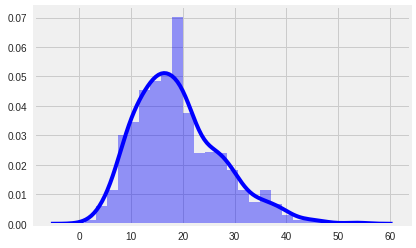

In [380]:
sns.distplot(pd.DataFrame(RESULTADO[1]),hist=True,kde=True,bins=25,color='blue')

In [381]:
f = Fitter(pd.DataFrame(RESULTADO[1]))
f.fit()

/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Searching best parameters for distribution alpha (error 0.0645028969867)
Searching best parameters for distribution anglit (error 0.0858115720869)
Searching best parameters for distribution arcsine (error 0.117159811799)


/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:5252: RuntimeWarning: divide by zero encountered in double_scalars
  return chi**3 / (_norm_pdf_C * _argus_phi(chi)) * x * np.sqrt(y) * np.exp(-chi**2 * y / 2)
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:404: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Searching best parameters for distribution argus (error 0.100228083513)
Searching best parameters for distribution beta (error 0.0644284644731)


/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:554: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:558: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1037: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


Searching best parameters for distribution betaprime (error 0.064421421827)
Searching best parameters for distribution bradford (error 0.0925264790092)
Searching best parameters for distribution burr (error 0.0647591790234)
Searching best parameters for distribution burr12 (error 0.0646028794273)
Searching best parameters for distribution cauchy (error 0.068866398614)
Searching best parameters for distribution chi (error 0.350188930273)
Searching best parameters for distribution chi2 (error 0.0644302630672)
Searching best parameters for distribution cosine (error 0.0785308974673)
Searching best parameters for distribution dgamma (error 0.0655652808434)
Searching best parameters for distribution dweibull (error 0.065127352407)


/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 6.3000000000000007.
  RuntimeWarning)
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.6999999999999993.
  RuntimeWarning)
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.7999999999999989.
  RuntimeWarning)
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.9499999999999993.
  RuntimeWarning)
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: 

Searching best parameters for distribution erlang (error 0.0644302659412)
Searching best parameters for distribution expon (error 0.100897322324)
Searching best parameters for distribution exponnorm (error 0.0647616938001)
Searching best parameters for distribution exponpow (error 0.262419833612)


/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:1232: RuntimeWarning: invalid value encountered in add
  negxc + sc.xlogy(c - 1.0, x))


Searching best parameters for distribution exponweib (error 0.292773232658)
Searching best parameters for distribution f (error 0.0644217822357)
Searching best parameters for distribution fatiguelife (error 0.0644044815066)
Searching best parameters for distribution fisk (error 0.0648549923397)
Searching best parameters for distribution foldcauchy (error 0.0677758491493)


/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1612: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))


Searching best parameters for distribution foldnorm (error 0.0872027587133)
Searching best parameters for distribution frechet_l (error 0.0644634850486)
Searching best parameters for distribution frechet_r (error 0.310788147873)
Searching best parameters for distribution gamma (error 0.0644302653053)
Searching best parameters for distribution gausshyper (error 0.0656158276857)
Searching best parameters for distribution genexpon (error 0.0672399797198)
Searching best parameters for distribution genextreme (error 0.0644634743877)


/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:1894: RuntimeWarning: invalid value encountered in true_divide
  np.sign(c)*(-g3+(g2+2*g2mg12)*g1)/((g2mg12)**(3./2.)))
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:1899: RuntimeWarning: invalid value encountered in true_divide
  (g4+(-4*g3+3*(g2+g2mg12)*g1)*g1)/((g2mg12)**2))


Searching best parameters for distribution gengamma (error 0.0644134407345)
Searching best parameters for distribution genhalflogistic (error 0.0792862038402)
Searching best parameters for distribution genlogistic (error 0.0644659591453)
Searching best parameters for distribution gennorm (error 0.0670466680809)


/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:1753: RuntimeWarning: divide by zero encountered in true_divide
  val = val + cnk * (-1) ** ki / (1.0 - c * ki)


Searching best parameters for distribution genpareto (error 0.0882253612315)
Searching best parameters for distribution gilbrat (error 0.0849881044747)
Searching best parameters for distribution gompertz (error 0.0701524508078)
Searching best parameters for distribution gumbel_l (error 0.0764944681214)
Searching best parameters for distribution gumbel_r (error 0.0644533661895)
Searching best parameters for distribution halfcauchy (error 0.0961311342543)
Searching best parameters for distribution halfgennorm (error 0.130815125216)
Searching best parameters for distribution halflogistic (error 0.0893646219969)
Searching best parameters for distribution halfnorm (error 0.0870420342041)
Searching best parameters for distribution hypsecant (error 0.066784032449)
Searching best parameters for distribution invgamma (error 0.0644511787807)
Searching best parameters for distribution invgauss (error 0.0644060668032)
Searching best parameters for distribution invweibull (error 0.0644545344558)
Se

/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:35: RuntimeWarning: floating point number truncated to an integer
  return 1.0 - sc.smirnov(n, x)


Searching best parameters for distribution ksone (error nan)
Searching best parameters for distribution kstwobign (error 0.0644392572638)
Searching best parameters for distribution laplace (error 0.0680215353852)
Searching best parameters for distribution levy (error 0.0966401442119)
Searching best parameters for distribution levy_l (error 0.115216038706)
(<type 'exceptions.NotImplementedError'>, NotImplementedError(), <traceback object at 0x7f49781b4908>)
SKIPPED levy_stable distribution (taking more than 10 seconds)
Searching best parameters for distribution loggamma (error 0.0679970669622)
Searching best parameters for distribution logistic (error 0.0668690075246)
Searching best parameters for distribution loglaplace (error 0.0665001876788)


/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:3157: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


Searching best parameters for distribution lognorm (error 0.0644237480745)
Searching best parameters for distribution lomax (error 0.100780007598)
Searching best parameters for distribution maxwell (error 0.0651925247238)


/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


Searching best parameters for distribution mielke (error 0.0647576021023)
Searching best parameters for distribution nakagami (error 0.14432786535)


/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:3684: RuntimeWarning: divide by zero encountered in power
  return 2*nu**nu/sc.gamma(nu)*(x**(2*nu-1.0))*np.exp(-nu*x*x)


Searching best parameters for distribution ncf (error 0.0644073734371)
Searching best parameters for distribution nct (error 0.0644895165705)
Searching best parameters for distribution ncx2 (error 0.0829231260479)
Searching best parameters for distribution norm (error 0.0677153222457)
Searching best parameters for distribution pareto (error 0.16664763331)
Searching best parameters for distribution pearson3 (error 0.0644302715939)
Searching best parameters for distribution powerlaw (error 0.0986072247771)


/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4281: RuntimeWarning: divide by zero encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4281: RuntimeWarning: invalid value encountered in multiply
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4281: RuntimeWarning: overflow encountered in power
  pow(_norm_cdf(-np.log(x)/s), c*1.0-1.0))


Searching best parameters for distribution powerlognorm (error 0.0904318716293)
Searching best parameters for distribution powernorm (error 0.0648334965513)
Searching best parameters for distribution rayleigh (error 0.0668536215315)
Searching best parameters for distribution rdist (error 0.0677184988884)
Searching best parameters for distribution recipinvgauss (error 0.0644040263436)
Searching best parameters for distribution reciprocal (error 0.1333001068)
Searching best parameters for distribution rice (error 0.0668536221153)
(<type 'exceptions.TypeError'>, TypeError('unbound method fit() must be called with rv_continuous instance as first argument (got ndarray instance instead)',), <traceback object at 0x7f49783b4830>)
SKIPPED rv_continuous distribution (taking more than 10 seconds)
(<type 'exceptions.TypeError'>, TypeError('unbound method fit() must be called with rv_histogram instance as first argument (got ndarray instance instead)',), <traceback object at 0x7f497813ce60>)
SKIPPE

/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4685: RuntimeWarning: divide by zero encountered in true_divide
  choicelist = [u * x / c, u, u * (1 - x) / (1 - d)]
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4734: RuntimeWarning: divide by zero encountered in true_divide
  return np.where(x < c, 2*x/c, 2*(1-x)/(1-c))


Searching best parameters for distribution trapz (error 0.120123206213)
Searching best parameters for distribution triang (error 0.072050683634)
Searching best parameters for distribution truncexpon (error 0.0917088293647)


/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4838: RuntimeWarning: divide by zero encountered in log
  self._logdelta = np.log(self._delta)
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4838: RuntimeWarning: invalid value encountered in log
  self._logdelta = np.log(self._delta)
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4896: RuntimeWarning: divide by zero encountered in power
  Px = Fx**(lam-1.0) + (np.asarray(1-Fx))**(lam-1.0)


Searching best parameters for distribution truncnorm (error 0.1333001068)
Searching best parameters for distribution tukeylambda (error 0.0670409151102)
Searching best parameters for distribution uniform (error 0.097700249199)
Searching best parameters for distribution vonmises (error 1.26702479684e+62)
Searching best parameters for distribution vonmises_line (error 0.100748050204)
Searching best parameters for distribution wald (error 0.0801772436468)
Searching best parameters for distribution weibull_max (error 0.0644634850486)
Searching best parameters for distribution weibull_min (error 0.310788147873)
Searching best parameters for distribution wrapcauchy (error nan)


/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/optimize/optimize.py:528: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


               sumsquare_error
recipinvgauss         0.064404
fatiguelife           0.064404
invgauss              0.064406
johnsonsb             0.064407
ncf                   0.064407
gengamma              0.064413
betaprime             0.064421
f                     0.064422
lognorm               0.064424
johnsonsu             0.064426


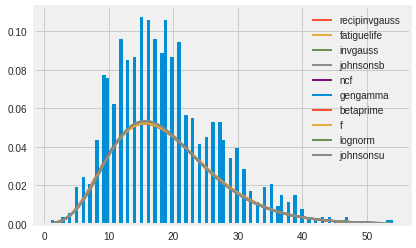

In [382]:
f.summary(Nbest=10)

In [383]:
RESULTADO=GENERACIONES(10000)

In [384]:
RESULTADO

({1: {1: 462, 2: 208, 3: 149, 4: 89, 5: 53, 6: 35, 7: 31, 8: 26},
  2: {1: 475, 2: 169, 3: 92, 4: 46, 5: 24, 6: 17, 7: 13, 8: 12},
  3: {1: 462, 2: 158, 3: 79, 4: 41, 5: 20, 6: 13, 7: 12, 8: 10},
  4: {1: 558, 2: 245, 3: 147, 4: 100, 5: 68, 6: 60, 7: 43, 8: 43},
  5: {1: 531, 2: 176, 3: 116, 4: 74, 5: 43, 6: 30, 7: 26, 8: 23},
  6: {1: 510, 2: 200, 3: 132, 4: 68, 5: 31, 6: 23, 7: 18, 8: 16},
  7: {1: 488, 2: 181, 3: 130, 4: 75, 5: 41, 6: 20, 7: 16, 8: 13},
  8: {1: 486, 2: 177, 3: 103, 4: 77, 5: 34, 6: 22, 7: 14, 8: 14},
  9: {1: 419, 2: 204, 3: 145, 4: 96, 5: 53, 6: 42, 7: 27, 8: 25},
  10: {1: 402, 2: 128, 3: 69, 4: 45, 5: 22, 6: 16, 7: 12, 8: 11},
  11: {1: 432, 2: 163, 3: 99, 4: 52, 5: 21, 6: 16, 7: 12, 8: 10},
  12: {1: 444, 2: 209, 3: 111, 4: 72, 5: 39, 6: 30, 7: 16, 8: 15},
  13: {1: 462, 2: 271, 3: 173, 4: 143, 5: 86, 6: 60, 7: 41, 8: 35},
  14: {1: 428, 2: 211, 3: 114, 4: 64, 5: 32, 6: 22, 7: 20, 8: 19},
  15: {1: 470, 2: 176, 3: 99, 4: 55, 5: 32, 6: 23, 7: 20, 8: 18},
  16: {

En promedio se espera que para la generación de 2015, salgan: 20


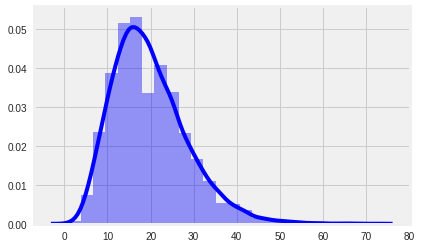

In [395]:
print "En promedio se espera que para la generación de 2015, salgan: %.0f" %pd.DataFrame(RESULTADO[1]).mean()
sns.distplot(pd.DataFrame(RESULTADO[1]),hist=True,kde=True,bins=25,color='blue')

In [396]:
f1 = Fitter(pd.DataFrame(RESULTADO[1]))
f1.fit()

Searching best parameters for distribution alpha (error 0.0204022290311)
Searching best parameters for distribution anglit (error 0.0442443155136)
Searching best parameters for distribution arcsine (error 0.0656979885813)
Searching best parameters for distribution argus (error 0.053757354402)


/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Searching best parameters for distribution beta (error 0.0203631848199)
Searching best parameters for distribution betaprime (error 0.0203563026828)
Searching best parameters for distribution bradford (error 0.0443048176844)
Searching best parameters for distribution burr (error 0.0206756451963)
Searching best parameters for distribution burr12 (error 0.0204470517257)
Searching best parameters for distribution cauchy (error 0.0244722024957)
Searching best parameters for distribution chi (error 0.0207961722461)
Searching best parameters for distribution chi2 (error 0.0203631845989)
Searching best parameters for distribution cosine (error 0.0388146374611)
Searching best parameters for distribution dgamma (error 0.0202876370285)
Searching best parameters for distribution dweibull (error 0.020609406509)


/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.25.
  RuntimeWarning)
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.75.
  RuntimeWarning)
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.8333333333333339.
  RuntimeWarning)
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 4.9583333333333339.
  RuntimeWarning)
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the e

/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.682153522304624.
  RuntimeWarning)
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.6902062370411581.
  RuntimeWarning)
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.6803820837070766.
  RuntimeWarning)
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value 5.6845322138492698.
  RuntimeWarning)
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning: T

Searching best parameters for distribution erlang (error 0.0203631831536)
Searching best parameters for distribution expon (error 0.0472673525334)
Searching best parameters for distribution exponnorm (error 0.0206193592119)
Searching best parameters for distribution exponpow (error 0.0249558491526)
Searching best parameters for distribution exponweib (error 0.0203544393833)
Searching best parameters for distribution f (error 0.0203564058846)
Searching best parameters for distribution fatiguelife (error 0.0203542219062)
Searching best parameters for distribution fisk (error 0.0206958977165)
Searching best parameters for distribution foldcauchy (error 0.0235571748115)
Searching best parameters for distribution foldnorm (error 0.0371254219917)
Searching best parameters for distribution frechet_l (error 0.0203761566325)
Searching best parameters for distribution frechet_r (error 0.19476533702)
Searching best parameters for distribution gamma (error 0.020363185192)


/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2587: RuntimeWarning: invalid value encountered in power
  return 1.0/Cinv * x**(a-1.0) * (1.0-x)**(b-1.0) / (1.0+z*x)**c


Searching best parameters for distribution gausshyper (error 0.0204487175725)
Searching best parameters for distribution genexpon (error 0.0246069631437)
Searching best parameters for distribution genextreme (error 0.0203761492201)
Searching best parameters for distribution gengamma (error 0.0203567111552)
Searching best parameters for distribution genhalflogistic (error 0.0339265022265)
Searching best parameters for distribution genlogistic (error 0.0203994300786)
Searching best parameters for distribution gennorm (error 0.0222244866308)
Searching best parameters for distribution genpareto (error 0.040138556717)
Searching best parameters for distribution gilbrat (error 0.0356759242703)
Searching best parameters for distribution gompertz (error 0.139007120787)
Searching best parameters for distribution gumbel_l (error 0.0293954848748)
Searching best parameters for distribution gumbel_r (error 0.0204029540242)
Searching best parameters for distribution halfcauchy (error 0.0438806725549)

/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4313: RuntimeWarning: divide by zero encountered in power
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))
/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:4313: RuntimeWarning: invalid value encountered in multiply
  return c*_norm_pdf(x) * (_norm_cdf(-x)**(c-1.0))


Searching best parameters for distribution powernorm (error nan)
Searching best parameters for distribution rayleigh (error 0.0222442231209)
Searching best parameters for distribution rdist (error 0.0225597982536)
Searching best parameters for distribution recipinvgauss (error 0.0203540887654)
Searching best parameters for distribution reciprocal (error 0.0703592937909)
Searching best parameters for distribution rice (error 0.021602694972)
(<type 'exceptions.TypeError'>, TypeError('unbound method fit() must be called with rv_continuous instance as first argument (got ndarray instance instead)',), <traceback object at 0x7f496ac178c0>)
SKIPPED rv_continuous distribution (taking more than 10 seconds)
(<type 'exceptions.TypeError'>, TypeError('unbound method fit() must be called with rv_histogram instance as first argument (got ndarray instance instead)',), <traceback object at 0x7f496aab13f8>)
SKIPPED rv_histogram distribution (taking more than 10 seconds)
Searching best parameters for di

               sumsquare_error
dgamma                0.020288
recipinvgauss         0.020354
johnsonsb             0.020354
fatiguelife           0.020354
exponweib             0.020354
invgauss              0.020355
betaprime             0.020356
f                     0.020356
gengamma              0.020357
powerlognorm          0.020360


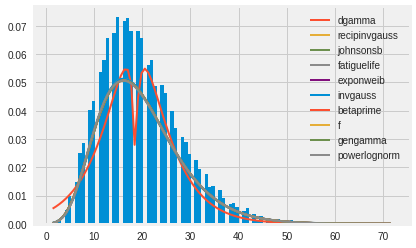

In [397]:
f1.summary(Nbest=10)

In [402]:
import plotly.plotly as py
import plotly.graph_objs as go
x0 = RESULTADO[1]

trace1 = go.Histogram(
    x=x0,
    opacity=0.75
)

data = [trace1]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

In [ ]:
data = [go.Scatter(
          x=y['new1'],
          y=y['Ingresos'])]
layout = dict(
    title='Time Series with Rangeslider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "INGRESOS A LA CARRERA DE ACTUARIA ACATLAN")

In [415]:
w["Gen."]=w["new1"]
trace_high = go.Scatter(x=w['Gen.'],
                        y=w['EGRESADOS'],
                        name='EGRESADOS',
                        line=dict(color='#33CFA5'))


trace_low = go.Scatter(x=w['Gen.'],
                        y=w['TITULADOS'],
                       name='TITULADOS',
                       line=dict(color='#F06A6A'))


data = [trace_high, trace_low]

layout = dict(
    title='Time Series with Rangeslider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "EGRESOS Y TITULADOS")

In [420]:
hij[0][hij[0]['TEORIA DEL RIESGO I']==1].count()

id_alumno                   29
grupo                       29
ANALISIS NUMERICO           29
DEMOGRAFIA MATEMATICA I     29
TEORIA DEL RIESGO I         29
ADMINISTRACION ACTUARIAL    29
INGLES VI                   29
OPTATIVA_1                  29
OPTATIVA_2                  29
dtype: int64

In [570]:
def proba_aproba_sensible(i,j):
    indice=0
    aumenta_indice=j
    la_que_se_elijio=proba_aproba(i)
    indice = la_que_se_elijio+j
    if indice>1:
        indice=1
    return indice

In [571]:
def proba_aproba_optativa_sensible(j):
    indice=0
    aumenta_indice=j
    la_que_se_elijio=proba_aproba_optativa()
    indice = la_que_se_elijio+j
    if indice>1:
        indice=1
    return indice

In [498]:
RESULTADO_prueba=GENERACIONES(1)

In [494]:
RESULTADO_prueba

({1: {1: 516, 2: 202, 3: 127, 4: 86, 5: 56, 6: 18, 7: 16, 8: 15}}, [15])

In [495]:
hij[0]

,id_alumno,grupo,ANALISIS NUMERICO,DEMOGRAFIA MATEMATICA I,TEORIA DEL RIESGO I,ADMINISTRACION ACTUARIAL,INGLES VI,OPTATIVA_1,OPTATIVA_2
0,1,6,1,1,1,0,1,1,1
1,2,5,0,1,1,1,1,1,0
2,3,5,1,0,1,1,1,1,1
3,4,4,1,1,0,1,1,1,1
4,5,6,1,1,1,0,1,1,0
5,6,7,1,1,1,1,1,1,0
6,7,4,1,1,1,1,1,1,1
7,8,7,1,1,1,1,1,1,0
8,9,3,0,1,1,0,1,1,1
9,10,2,0,0,1,1,1,1,1


In [667]:
def aprobacion_grupo_sensible(aumento):
    c=dict()
    for j in range(1,7):
        d=[]
        for i in a[j]['MATERIA'].tolist():
            d.append(proba_aproba_sensible(i,aumento))
        o=a[j]['MATERIA'].tolist()
        abcd=pd.DataFrame(d,columns=['proba_aproba'])
        ou=pd.DataFrame(o,columns=['MATERIA'])
        c[j]=pd.concat([ou,abcd],axis=1)
    return c
def aprobacion_grupo_sensible_8(aumento):
    c=dict()
    d=[]
    for i in a[8]['MATERIA'].tolist():
        if i=='OPTATIVA_1' or i=='OPTATIVA_2' or i=='OPTATIVA_3'or i=='OPTATIVAS_4'or i=='OPTATIVAS_5':
            gh=0
            d.append(proba_aproba_optativa_sensible(aumento))
        else:
            d.append(proba_aproba_sensible(i,aumento))
    o=a[8]['MATERIA'].tolist()
    abcd=pd.DataFrame(d,columns=['proba_aproba'])
    ou=pd.DataFrame(o,columns=['MATERIA'])
    c[8]=pd.concat([ou,abcd],axis=1)
    return c
def aprobacion_grupo_sensible_7(aumento):
    c=dict()
    d=[]
    for i in a[7]['MATERIA'].tolist():
        if i=='OPTATIVA_1' or i=='OPTATIVA_2' or i=='OPTATIVA_3'or i=='OPTATIVAS_4'or i=='OPTATIVAS_5':
            gh=0
            d.append(proba_aproba_optativa_sensible(aumento))
        else:
            d.append(proba_aproba_sensible(i,aumento))
    o=a[7]['MATERIA'].tolist()
    abcd=pd.DataFrame(d,columns=['proba_aproba'])
    ou=pd.DataFrame(o,columns=['MATERIA'])
    c[7]=pd.concat([ou,abcd],axis=1)
    return c
def info_1_s(meter_12,aumento):
    grupos=dict()
    grupos[0]=[]
    for i in range(1,7+1):
        grupos[i]=aprobacion_grupo_sensible(aumento)[1]
        for k in grupos[i]['MATERIA'].tolist():
            if i==1:
                meter_12[''+k+'']=map(lambda x: 0, range(0,len(meter_12['id_alumno'].tolist())))
            pro=float(grupos[i][grupos[i]['MATERIA']==k]['proba_aproba'])
            for j in meter_12[meter_12['grupo']==i]['id_alumno'].tolist():
                meter_12[''+k+''][meter_12['id_alumno']==j]=np.random.choice([1,0],p=[pro,1-pro])
    return meter_12,grupos
def info_2_s(meter_12,aumento):
    grupos=dict()
    grupos[0]=[]
    for i in range(1,7+1):
        grupos[i]=aprobacion_grupo_sensible(aumento)[2]
        for k in grupos[i]['MATERIA'].tolist():
            if i==1:
                meter_12[''+k+'']=map(lambda x: 0, range(0,len(meter_12['id_alumno'].tolist())))
            pro=float(grupos[i][grupos[i]['MATERIA']==k]['proba_aproba'])
            for j in meter_12[meter_12['grupo']==i]['id_alumno'].tolist():
                meter_12[''+k+''][meter_12['id_alumno']==j]=np.random.choice([1,0],p=[pro,1-pro])
    return meter_12,grupos
def info_3_s(meter_12,aumento):
    grupos=dict()
    grupos[0]=[]
    for i in range(1,7+1):
        grupos[i]=aprobacion_grupo_sensible(aumento)[3]
        for k in grupos[i]['MATERIA'].tolist():
            if i==1:
                meter_12[''+k+'']=map(lambda x: 0, range(0,len(meter_12['id_alumno'].tolist())))
            pro=float(grupos[i][grupos[i]['MATERIA']==k]['proba_aproba'])
            for j in meter_12[meter_12['grupo']==i]['id_alumno'].tolist():
                meter_12[''+k+''][meter_12['id_alumno']==j]=np.random.choice([1,0],p=[pro,1-pro])
    return meter_12,grupos
def info_4_s(meter_12,aumento):
    grupos=dict()
    grupos[0]=[]
    for i in range(1,7+1):
        grupos[i]=aprobacion_grupo_sensible(aumento)[4]
        for k in grupos[i]['MATERIA'].tolist():
            if i==1:
                meter_12[''+k+'']=map(lambda x: 0, range(0,len(meter_12['id_alumno'].tolist())))
            pro=float(grupos[i][grupos[i]['MATERIA']==k]['proba_aproba'])
            for j in meter_12[meter_12['grupo']==i]['id_alumno'].tolist():
                meter_12[''+k+''][meter_12['id_alumno']==j]=np.random.choice([1,0],p=[pro,1-pro])
    return meter_12,grupos
def info_5_s(meter_12,aumento):
    grupos=dict()
    grupos[0]=[]
    for i in range(1,7+1):
        grupos[i]=aprobacion_grupo_sensible(aumento)[5]
        for k in grupos[i]['MATERIA'].tolist():
            if i==1:
                meter_12[''+k+'']=map(lambda x: 0, range(0,len(meter_12['id_alumno'].tolist())))
            pro=float(grupos[i][grupos[i]['MATERIA']==k]['proba_aproba'])
            for j in meter_12[meter_12['grupo']==i]['id_alumno'].tolist():
                meter_12[''+k+''][meter_12['id_alumno']==j]=np.random.choice([1,0],p=[pro,1-pro])
    return meter_12,grupos
def info_6_s(meter_12,aumento):
    grupos=dict()
    grupos[0]=[]
    for i in range(1,7+1):
        grupos[i]=aprobacion_grupo_sensible(aumento)[6]
        for k in grupos[i]['MATERIA'].tolist():
            if i==1:
                meter_12[''+k+'']=map(lambda x: 0, range(0,len(meter_12['id_alumno'].tolist())))
            pro=float(grupos[i][grupos[i]['MATERIA']==k]['proba_aproba'])
            for j in meter_12[meter_12['grupo']==i]['id_alumno'].tolist():
                meter_12[''+k+''][meter_12['id_alumno']==j]=np.random.choice([1,0],p=[pro,1-pro])
    return meter_12,grupos


def info_7_s(meter_12,aumento):
    grupos=dict()
    grupos[0]=[]
    for i in range(1,7+1):
        grupos[i]=aprobacion_grupo_sensible_7(aumento)[7]
        for k in grupos[i]['MATERIA'].tolist():
            if i==1:
                meter_12[''+k+'']=map(lambda x: 0, range(0,len(meter_12['id_alumno'].tolist())))
            pro=float(grupos[i][grupos[i]['MATERIA']==k]['proba_aproba'])
            for j in meter_12[meter_12['grupo']==i]['id_alumno'].tolist():
                meter_12[''+k+''][meter_12['id_alumno']==j]=np.random.choice([1,0],p=[pro,1-pro])
    return meter_12,grupos
def info_8_s(meter_12,aumento):
    grupos=dict()
    grupos[0]=[]
    for i in range(1,7+1):
        grupos[i]=aprobacion_grupo_sensible_8(aumento)[8]
        for k in grupos[i]['MATERIA'].tolist():
            if i==1:
                meter_12[''+k+'']=map(lambda x: 0, range(0,len(meter_12['id_alumno'].tolist())))
            pro=float(grupos[i][grupos[i]['MATERIA']==k]['proba_aproba'])
            for j in meter_12[meter_12['grupo']==i]['id_alumno'].tolist():
                meter_12[''+k+''][meter_12['id_alumno']==j]=np.random.choice([1,0],p=[pro,1-pro])
    return meter_12,grupos

In [641]:
def GENERACIONES_SENSIBLE(n,aumento):
    gen=dict()
    egre=[]
    for k in range(1,n+1):
        ingreso=sim_ingreso(1,2015)[0]
        semestre=dict()
        semestre[1]=ingreso
        for i in range(1,8):
            if i==1:
                hij=info_1_s(meter_1(semestre[i]),aumento)
            elif i==2:
                hij=info_2_s(meter_1(semestre[i]),aumento)
            elif i==3:
                hij=info_3_s(meter_1(semestre[i]),aumento)
            elif i==4:
                hij=info_4_s(meter_1(semestre[i]),aumento)
            elif i==5:
                hij=info_5_s(meter_1(semestre[i]),aumento)
            elif i==6: 
                hij=info_6_s(meter_1(semestre[i]),aumento)
            elif i==7:
                hij=info_7_s(meter_1(semestre[i]),aumento)
            else:
                hij=info_8_s(meter_1(semestre[i]),aumento)

            if i==1:
                semestre[i+1]=hij[0][hij[0]['CALCULO DIFERENCIAL E INTEGRAL I']==1].count()[2]
            elif i==2:
                semestre[i+1]=hij[0][hij[0]['CALCULO DIFERENCIAL E INTEGRAL II']==1].count()[2]
            elif i==3:
                semestre[i+1]=hij[0][hij[0]['PROBABILIDAD I']==1].count()[2]
            elif i==4:
                semestre[i+1]=hij[0][hij[0]['ESTADISTICA I']==1].count()[2]
            elif i==5:
                semestre[i+1]=hij[0][hij[0]['PROBABILIDAD II']==1].count()[2]
            elif i==6:
                semestre[i+1]=hij[0][hij[0]['PROCESOS ESTOCASTICOS I']==1].count()[2]
            elif i==7:
                semestre[i+1]=hij[0][hij[0]['TEORIA DEL RIESGO I']==1].count()[2]
            else:
                semestre[i+1]=hij[0][hij[0]['ADMINISTRACION DE RIESGOS']==1].count()[2]
        gen[k]=semestre
        egre.append(semestre[8])
    return gen,egre

In [669]:
n=1
aumento=.1
RESULTADO_SENSIBLE=GENERACIONES_SENSIBLE(n,aumento)

In [670]:
RESULTADO_SENSIBLE

({1: {1: 438, 2: 197, 3: 143, 4: 109, 5: 71, 6: 38, 7: 26, 8: 25}}, [25])

In [671]:
n=1000
aumento=.1
RESULTADO_SENSIBLE_1000=GENERACIONES_SENSIBLE(n,aumento)

In [672]:
RESULTADO_SENSIBLE_1000

({1: {1: 490, 2: 280, 3: 185, 4: 154, 5: 83, 6: 71, 7: 65, 8: 62},
  2: {1: 451, 2: 203, 3: 151, 4: 94, 5: 67, 6: 64, 7: 56, 8: 56},
  3: {1: 493, 2: 173, 3: 125, 4: 71, 5: 37, 6: 28, 7: 15, 8: 15},
  4: {1: 506, 2: 323, 3: 207, 4: 155, 5: 99, 6: 84, 7: 74, 8: 73},
  5: {1: 520, 2: 276, 3: 193, 4: 139, 5: 88, 6: 64, 7: 56, 8: 53},
  6: {1: 492, 2: 229, 3: 138, 4: 103, 5: 74, 6: 56, 7: 48, 8: 44},
  7: {1: 510, 2: 280, 3: 201, 4: 156, 5: 72, 6: 61, 7: 55, 8: 53},
  8: {1: 448, 2: 211, 3: 136, 4: 82, 5: 59, 6: 43, 7: 36, 8: 35},
  9: {1: 524, 2: 192, 3: 142, 4: 107, 5: 75, 6: 42, 7: 28, 8: 27},
  10: {1: 483, 2: 267, 3: 161, 4: 121, 5: 75, 6: 69, 7: 55, 8: 53},
  11: {1: 410, 2: 248, 3: 166, 4: 136, 5: 104, 6: 94, 7: 89, 8: 87},
  12: {1: 450, 2: 227, 3: 171, 4: 124, 5: 71, 6: 54, 7: 44, 8: 42},
  13: {1: 422, 2: 198, 3: 129, 4: 88, 5: 61, 6: 52, 7: 51, 8: 46},
  14: {1: 476, 2: 256, 3: 201, 4: 131, 5: 87, 6: 64, 7: 57, 8: 56},
  15: {1: 557, 2: 344, 3: 206, 4: 127, 5: 69, 6: 66, 7: 60, 

En promedio se espera que para la generación de 2015, salgan: 49


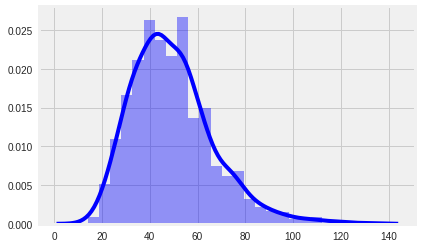

In [673]:
print "En promedio se espera que para la generación de 2015, salgan: %.0f" %pd.DataFrame(RESULTADO_SENSIBLE_1000[1]).mean()
sns.distplot(pd.DataFrame(RESULTADO_SENSIBLE_1000[1]),hist=True,kde=True,bins=25,color='blue')

In [675]:
f2 = Fitter(pd.DataFrame(RESULTADO_SENSIBLE_1000[1]))
f2.fit()

Searching best parameters for distribution alpha (error 0.00216929861679)
Searching best parameters for distribution anglit (error 0.00785444672022)
Searching best parameters for distribution arcsine (error 0.0141773610265)
Searching best parameters for distribution argus (error 0.0106511667271)
Searching best parameters for distribution beta (error 0.00218779204803)
Searching best parameters for distribution betaprime (error 0.00216250432829)
Searching best parameters for distribution bradford (error 0.00920640394393)
Searching best parameters for distribution burr (error 0.00225702869684)
Searching best parameters for distribution burr12 (error 0.00221076101327)
Searching best parameters for distribution cauchy (error 0.00346285974958)
Searching best parameters for distribution chi (error 0.0833860937714)
Searching best parameters for distribution chi2 (error 0.00216091434094)
Searching best parameters for distribution cosine (error 0.00615210720607)
Searching best parameters for dis

/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning:

The shape parameter of the erlang distribution has been given a non-integer value 4.2000000000000002.

/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning:

The shape parameter of the erlang distribution has been given a non-integer value 4.1333333333333329.

/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning:

The shape parameter of the erlang distribution has been given a non-integer value 4.2222222222222214.

/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning:

The shape parameter of the erlang distribution has been given a non-integer value 4.3333333333333321.

/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning:

The shape parameter of the erlang distribution has been given a

/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning:

The shape parameter of the erlang distribution has been given a non-integer value 5.8271507236443441.

/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning:

The shape parameter of the erlang distribution has been given a non-integer value 5.8271558342162546.

/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning:

The shape parameter of the erlang distribution has been given a non-integer value 5.8266760871011858.

/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning:

The shape parameter of the erlang distribution has been given a non-integer value 5.827250250467694.

/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_continuous_distns.py:2123: RuntimeWarning:

The shape parameter of the erlang distribution has been given a 

Searching best parameters for distribution erlang (error 0.0021609140459)
Searching best parameters for distribution expon (error 0.00981537870468)
Searching best parameters for distribution exponnorm (error 0.00223590067078)
Searching best parameters for distribution exponpow (error 0.00351137554502)
Searching best parameters for distribution exponweib (error 0.0021636433527)
Searching best parameters for distribution f (error 0.00216211526879)
Searching best parameters for distribution fatiguelife (error 0.00216364675574)
Searching best parameters for distribution fisk (error 0.00226921170226)
Searching best parameters for distribution foldcauchy (error 0.00311392988717)
Searching best parameters for distribution foldnorm (error 0.00268807082741)
Searching best parameters for distribution frechet_l (error 0.0373393324125)
Searching best parameters for distribution frechet_r (error 0.00232463469155)
Searching best parameters for distribution gamma (error 0.00216091392642)
Searching be

/home/dbh/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1612: RuntimeWarning:

invalid value encountered in log



Stop has been called
SKIPPED ncf distribution (taking more than 10 seconds)
Searching best parameters for distribution nct (error 0.002189707235)
Searching best parameters for distribution ncx2 (error 0.00216091451206)
Searching best parameters for distribution norm (error 0.00268807376749)
Searching best parameters for distribution pareto (error 0.0194033323646)
Searching best parameters for distribution pearson3 (error 0.00216091355245)
Searching best parameters for distribution powerlaw (error 0.00984365684676)
Searching best parameters for distribution powerlognorm (error 0.00897165410702)
Searching best parameters for distribution powernorm (error nan)
Searching best parameters for distribution rayleigh (error 0.00250812723538)
Searching best parameters for distribution rdist (error 0.00268715073912)
Searching best parameters for distribution recipinvgauss (error 0.00216349687779)
Searching best parameters for distribution reciprocal (error 0.0174432025714)
Searching best paramete

In [ ]:
RESULTADO_1000=random.sample(RESULTADO[1],1000)

In [686]:

x0 = RESULTADO_1000
x1 = RESULTADO_SENSIBLE_1000[1]

trace1 = go.Histogram(
    x=x0,
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1,
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

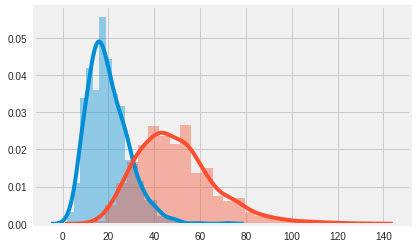

In [697]:
sns.distplot(RESULTADO_1000,hist=True,kde=True,bins=25)
sns.distplot(RESULTADO_SENSIBLE_1000[1],hist=True,kde=True,bins=25)

In [701]:
RESULTADO_SENSIBLE_10_00=GENERACIONES_SENSIBLE(10,.00)

In [702]:
RESULTADO_SENSIBLE_10_05=GENERACIONES_SENSIBLE(10,.05)

In [703]:
RESULTADO_SENSIBLE_10_10=GENERACIONES_SENSIBLE(10,.10)

In [704]:
RESULTADO_SENSIBLE_10_15=GENERACIONES_SENSIBLE(10,.15)

In [705]:
RESULTADO_SENSIBLE_10_20=GENERACIONES_SENSIBLE(10,.20)

En promedio se espera que para la generación de 2015 con aumento de .00, salgan: 19
En promedio se espera que para la generación de 2015 con aumento de .05, salgan: 32
En promedio se espera que para la generación de 2015 con aumento de .10, salgan: 48
En promedio se espera que para la generación de 2015 con aumento de .15, salgan: 72
En promedio se espera que para la generación de 2015 con aumento de .20, salgan: 96


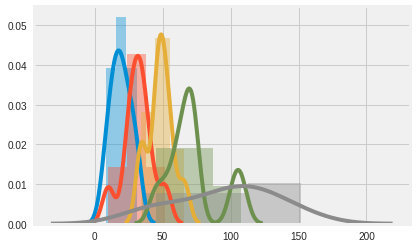

In [719]:
print "En promedio se espera que para la generación de 2015 con aumento de .00, salgan: %.0f" %pd.DataFrame(RESULTADO_SENSIBLE_10_00[1]).mean()
print "En promedio se espera que para la generación de 2015 con aumento de .05, salgan: %.0f" %pd.DataFrame(RESULTADO_SENSIBLE_10_05[1]).mean()
print "En promedio se espera que para la generación de 2015 con aumento de .10, salgan: %.0f" %pd.DataFrame(RESULTADO_SENSIBLE_10_10[1]).mean()
print "En promedio se espera que para la generación de 2015 con aumento de .15, salgan: %.0f" %pd.DataFrame(RESULTADO_SENSIBLE_10_15[1]).mean()
print "En promedio se espera que para la generación de 2015 con aumento de .20, salgan: %.0f" %pd.DataFrame(RESULTADO_SENSIBLE_10_20[1]).mean()

sns.distplot(RESULTADO_SENSIBLE_10_00[1],hist=True,kde=True,bins=3)
sns.distplot(RESULTADO_SENSIBLE_10_05[1],hist=True,kde=True,bins=3)
sns.distplot(RESULTADO_SENSIBLE_10_10[1],hist=True,kde=True,bins=3)
sns.distplot(RESULTADO_SENSIBLE_10_15[1],hist=True,kde=True,bins=3)
sns.distplot(RESULTADO_SENSIBLE_10_20[1],hist=True,kde=True,bins=3)

In [ ]:
RESULTADO_SENSIBLE_100_00=GENERACIONES_SENSIBLE(100,.00)
RESULTADO_SENSIBLE_100_05=GENERACIONES_SENSIBLE(100,.05)
RESULTADO_SENSIBLE_100_10=GENERACIONES_SENSIBLE(100,.10)
RESULTADO_SENSIBLE_100_15=GENERACIONES_SENSIBLE(100,.15)
RESULTADO_SENSIBLE_100_20=GENERACIONES_SENSIBLE(100,.20)

In [ ]:
print "En promedio se espera que para la generación de 2015 con aumento de .00, salgan: %.0f" %pd.DataFrame(RESULTADO_SENSIBLE_100_00[1]).mean()
print "En promedio se espera que para la generación de 2015 con aumento de .05, salgan: %.0f" %pd.DataFrame(RESULTADO_SENSIBLE_100_05[1]).mean()
print "En promedio se espera que para la generación de 2015 con aumento de .10, salgan: %.0f" %pd.DataFrame(RESULTADO_SENSIBLE_100_10[1]).mean()
print "En promedio se espera que para la generación de 2015 con aumento de .15, salgan: %.0f" %pd.DataFrame(RESULTADO_SENSIBLE_100_15[1]).mean()
print "En promedio se espera que para la generación de 2015 con aumento de .20, salgan: %.0f" %pd.DataFrame(RESULTADO_SENSIBLE_100_20[1]).mean()

sns.distplot(RESULTADO_SENSIBLE_100_00[1],hist=True,kde=True,bins=3)
sns.distplot(RESULTADO_SENSIBLE_100_05[1],hist=True,kde=True,bins=3)
sns.distplot(RESULTADO_SENSIBLE_100_10[1],hist=True,kde=True,bins=3)
sns.distplot(RESULTADO_SENSIBLE_100_15[1],hist=True,kde=True,bins=3)
sns.distplot(RESULTADO_SENSIBLE_100_20[1],hist=True,kde=True,bins=3)